In [60]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

In [61]:
Rshape = (17, 40, 38)
Lshape = (20, 42, 38)

In [62]:
def get_boundaries(size, alpha):
    bound_min = int(size//2 * (1 - alpha))
    bound_max = int(size//2 * (1 + alpha))
    
    if (bound_min < 0) or (bound_max > size):
        raise ValueError("Choose a smaller alpha")
    
    return bound_min, bound_max

In [63]:
def generate_plane_sulcus(side, orient, alpha=0.1, Rshape = (17, 40, 38),
                          Lshape = (20, 42, 38)):
    """Generate a 'vertical' fake plane sulcus.

    Arguments:
        - side: 'R' or 'L'
        - orient: dimension of the array on which generate the plane
        - alpha: ~size of the available positions interval
    """
    if side == 'R':
        shape = Rshape
    else:
        shape = Lshape
    
    bound_min, bound_max = get_boundaries(shape[orient], alpha)

    arr = np.zeros(shape)
    i_sillon = rd.randint(bound_min, bound_max+1)

    if orient == 1:
        arr[:,i_sillon,:] = 30
    else:
        arr[:,:,i_sillon] = 30

    return arr

In [64]:
generate_plane_sulcus('R', 1, Rshape=(3,4,5))

array([[[ 0.,  0.,  0.,  0.,  0.],
        [30., 30., 30., 30., 30.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [30., 30., 30., 30., 30.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [30., 30., 30., 30., 30.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]])

In [65]:
# generate the np arrays

N_subjects = 2500
alpha = 0.1
Rshape = (17, 40, 38)
Lshape = (20, 42, 38)

R_arrays = []
L_arrays = []
labels = []

for i_sub in range(N_subjects):
    R_orient = rd.randint(1,3)
    R_arrays.append(generate_plane_sulcus('R', orient=R_orient,
                                          alpha=alpha,
                                          Rshape=Rshape,
                                          Lshape=Lshape))

    L_orient = rd.randint(1,3)
    L_arrays.append(generate_plane_sulcus('L', orient=L_orient,
                                          alpha=alpha,
                                          Rshape=Rshape,
                                          Lshape=Lshape))

    if R_orient == L_orient:
        labels.append(0)
    else:
        labels.append(1)

R_arrays = np.array(R_arrays)
L_arrays = np.array(L_arrays)
labels = np.array(labels)

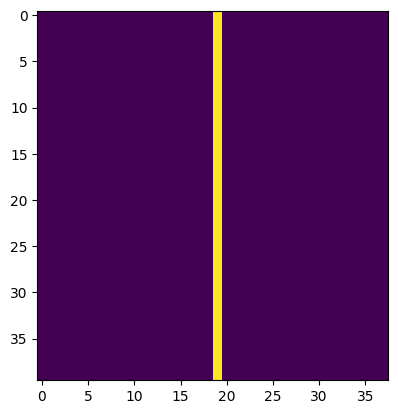

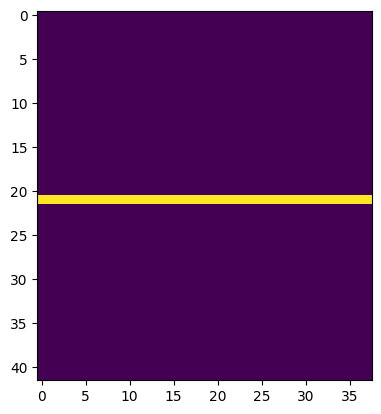

1


In [66]:
i_test = 51

plt.imshow(R_arrays[i_test][0])
plt.figure()
plt.imshow(L_arrays[i_test][0])
plt.show()
print(labels[i_test])

In [67]:
# check if good label repartition

print(labels.sum(), len(labels))

1283 2500


In [68]:
# save the arrays

save_path = "/neurospin/dico/data/deep_folding/current/datasets/benchmarks/asymetry"

# add the required extra dim
R_arrays = np.expand_dims(R_arrays, -1)
L_arrays = np.expand_dims(L_arrays, -1)

print(R_arrays.shape, L_arrays.shape)

np.save(save_path+'/Rarrays.npy', R_arrays)
np.save(save_path+'/Larrays.npy', L_arrays)

(2500, 17, 40, 38, 1) (2500, 20, 42, 38, 1)


In [69]:
# save the labels

names = ['fake_'+str(i) for i in range(N_subjects)]
labels_df = pd.DataFrame(np.transpose([names, labels]), columns=['Sub_ID', 'PCS_asymetry'])
labels_df.to_csv(save_path+'/labels.csv')

In [70]:
# save the subjects + generate train_val

subjects = labels_df['Sub_ID']
subjects = subjects.rename('Subject')

subjects.to_csv(save_path+'/subjects.csv')

train_val_percentage = 0.8

train_val, test = train_test_split(subjects, train_size=train_val_percentage)

print(train_val)
print(test)

train_val.to_csv(save_path+'/train_val_subjects.csv', index=False, header=False)

2475    fake_2475
1784    fake_1784
409      fake_409
462      fake_462
2301    fake_2301
          ...    
756      fake_756
1289    fake_1289
2102    fake_2102
293      fake_293
713      fake_713
Name: Subject, Length: 2000, dtype: object
917      fake_917
2252    fake_2252
1529    fake_1529
1490    fake_1490
124      fake_124
          ...    
1579    fake_1579
168      fake_168
1264    fake_1264
512      fake_512
1517    fake_1517
Name: Subject, Length: 500, dtype: object
